# Demonstration of NC Census Data Access
Thanks to Earth Lab https://earthdatascience.org/tutorials/get-cenus-data-with-cenpy/

In [1]:
import pandas as pd
import cenpy as cen
import pysal

In [2]:
%matplotlib inline

In [3]:
datasets = list(cen.explorer.available(verbose=True).items())
# print first rows of the dataframe containing datasets
pd.DataFrame(datasets).head()

,0,1
0,ACSSF5Y2010,2006-2010 American Community Survey 5-Year Est...
1,NONEMP2007,2007 Nonemployer Statistics: Non Employer Stat...
2,POPESTagesex,Vintage 2014 Population Estimates: National An...
3,ZBPTotal2011,2011 County Business Patterns - Zip Code Busin...
4,ITMonthlyImportsUSDA,Time Series International Trade: Monthly U.S. ...


In [4]:
dataset = '2012acs1'
cen.explorer.explain(dataset)

{'2012 American Community Survey: 1-Year Estimates': "The American Community Survey (ACS) is a nationwide survey designed to provide communities a fresh look at how they are changing. The ACS replaced the decennial census long form in 2010 and thereafter by collecting long form type information throughout the decade rather than only once every 10 years.  Questionnaires are mailed to a sample of addresses to obtain information about households -- that is, about each person and the housing unit itself.  The American Community Survey produces demographic, social, housing and economic estimates in the form of 1-year, 3-year and 5-year estimates based on population thresholds. The strength of the ACS is in estimating population and housing characteristics. It produces estimates for small areas, including census tracts and population subgroups.  Although the ACS produces population, demographic and housing unit estimates,it is the Census Bureau's Population Estimates Program that produces an

In [5]:
con = cen.base.Connection(dataset)
con

Connection to 2012 American Community Survey: 1-Year Estimates (ID: http://api.census.gov/data/id/2012acs1)

# Acquiring Data
## Geographical specification
Cenpy uses FIPS codes to specify the geographical extent of the data to be downloaded. The object con is our connection to the api, and the attribute geographies is a dictionary.

In [14]:
print(type(con))
print(type(con.geographies))
print(con.geographies.keys())

<class 'cenpy.remote.APIConnection'>
<class 'dict'>
dict_keys(['fips'])


In [15]:
# print head of data frame in the geographies dictionary
con.geographies['fips'].head()

,geoLevelId,name,optionalWithWCFor,requires,wildcard
0,500,congressional district,state,[state],[state]
1,060,county subdivision,NaN,"[state, county]",NaN
2,795,public use microdata area,NaN,[state],NaN
3,310,metropolitan statistical area/micropolitan sta...,NaN,NaN,NaN
4,160,place,state,[state],[state]


geo_unit and geo_filter are both necessary arguments for the query() function. geo_unit specifies the scale at which data should be taken. geo_filter then creates a filter to ensure too much data is not downloaded. The following example will download data from all counties in North Carolina (state FIPS codes are accessible here). https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm

In [16]:
g_unit = 'county:*'
g_filter = {'state':'37'}

## Specifying variables to extract
The other argument taken by query() is cols. This is a list of columns taken from the variables of the API. These variables can be displayed using the variables function, however, due to the number of variables it is easier to use the Social Explorer site to find data you are interested in.

https://www.socialexplorer.com/

In [18]:
var = con.variables
print("number of variables in dataset {}".format(len(var)))
con.variables.head()

number of variables in dataset 68401


,concept,group,label,limit,predicateOnly,predicateType,validValues
for,Census API Geography Specification,N/A,Census API FIPS 'for' clause,0,True,fips-for,NaN
in,Census API Geography Specification,N/A,Census API FIPS 'in' clause,0,True,fips-in,NaN
B20005E_045M,B20005E. Sex by Work Experience by Earnings f...,N/A,Margin of Error for!!Male:!!Other:!!With earni...,0,NaN,NaN,[]
B06004HPR_002M,"B06004HPR. Place of Birth (White Alone, Not H...",N/A,Margin of Error for!!Born in Puerto Rico,0,NaN,NaN,[]
B24126_438E,B24126. Detailed Occupation for the Full-Time...,N/A,"Multiple machine tool setters, operators, and ...",0,NaN,NaN,[]


Related columns of data will always start with the same base prefix, so cenpy has an included function, varslike, that will create a list of column names that match the input pattern. It is also useful to add on the NAME and GEOID columns, as these will provide the name and geographic id of all data. 

table of census columns is here https://beta.dataweb.rm.census.gov/data/2015/acs1/variables.html#B19056_002E

In [19]:
cols = ['B19083_001E']
cols.extend(['NAME', 'GEOID'])

With the three necessary arguments, data can be downloaded and saved as a pandas dataframe.

In [20]:
data = con.query(cols, geo_unit=g_unit, geo_filter=g_filter)
# prints a deprecation warning because of how cenpy calls pandas

/Users/georgecollier/.local/share/virtualenvs/ash_cen-uAf2Oe-v/lib/python3.6/site-packages/cenpy/remote.py:172: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df[cols] = df[cols].convert_objects(convert_numeric=convert_numeric)


In [22]:
data.index = data.NAME
# print first five rows and last five columns
data.iloc[:5]

,B19083_001E,NAME,GEOID,state,county
NAME,,,,,
"Alamance County, North Carolina",0.4575,"Alamance County, North Carolina",05000US37001,37,001
"Brunswick County, North Carolina",0.4607,"Brunswick County, North Carolina",05000US37019,37,019
"Buncombe County, North Carolina",0.4748,"Buncombe County, North Carolina",05000US37021,37,021
"Burke County, North Carolina",0.4473,"Burke County, North Carolina",05000US37023,37,023
"Cabarrus County, North Carolina",0.4364,"Cabarrus County, North Carolina",05000US37025,37,025


In [23]:
gini_data = data[['NAME', 'B19083_001E']].sort_values('B19083_001E')
gini_data.columns
gini_data.columns = ['County', 'GINI Index']

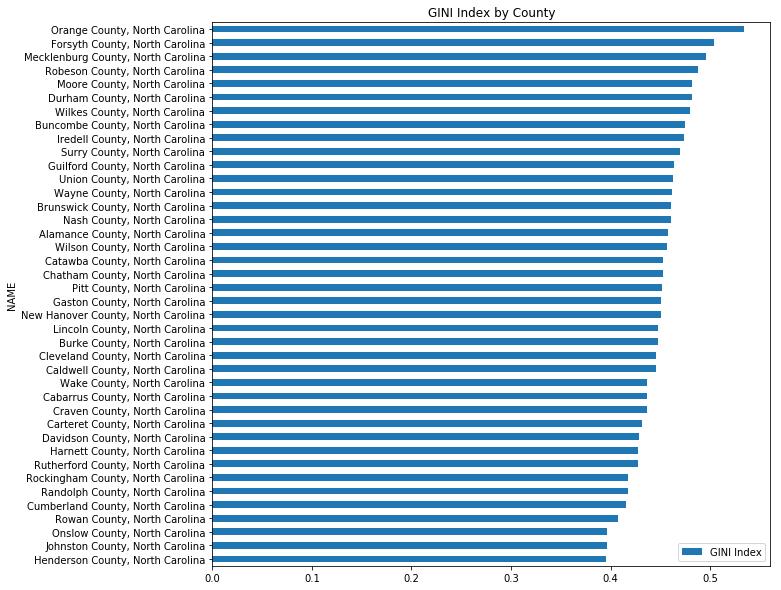

In [24]:
gini_data.plot(kind='barh', figsize=[10,10], title='GINI Index by County')